# Classificação multiclasse

A classificação multiclasse é um tipo de problema em machine learning e inteligência artificial no qual o objetivo é categorizar uma amostra de dados em uma de várias categorias ou classes possíveis. Diferentemente da classificação binária, que lida com apenas duas classes (por exemplo, "positivo" ou "negativo"), a classificação multiclasse envolve mais de duas classes, e cada instância de dados pertence a exatamente uma dessas classes.

## Importando as bibliotecas necessárias

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# sequential serve para montar uma rede
from keras.models import Sequential

# dense serve para você adicionar as camadas de configuração
from keras.layers import Dense

## Leitura e Tratamento dos dados

Por que limpar pré-manipular os dados ?

A pré-manipulação dos dados é essencial para o treinamento de modelos de machine learning. Ela garante que os dados estejam limpos e no formato adequado, permitindo que o treinamento seja mais preciso e eficaz, além de evitar erros e melhorar o desempenho do modelo.

### Lendo o dataset

In [2]:
# baixando o dataset
dataset = pd.read_csv('questao_01.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  310 non-null    int64  
 1   V1          310 non-null    float64
 2   V2          310 non-null    float64
 3   V3          310 non-null    float64
 4   V4          310 non-null    float64
 5   V5          310 non-null    float64
 6   V6          310 non-null    float64
 7   diagnostic  310 non-null    object 
dtypes: float64(6), int64(1), object(1)
memory usage: 19.5+ KB


### Verificação dos Dados

Vamos exibir algumas linhas aleatórias do dataset para visualizar os dados e entender melhor as colunas disponíveis.

In [3]:
# printando algumas linhas aleatórias
dataset.sample(10)

,Unnamed: 0,V1,V2,V3,V4,V5,V6,diagnostic
114,114,80.988074,36.843172,86.960602,44.144903,141.088149,85.872152,Spondylolisthesis
296,296,39.656902,16.208839,36.674857,23.448063,131.922009,-4.968980,Normal
189,189,82.406524,29.276422,77.054565,53.130102,117.042244,62.765348,Spondylolisthesis
33,33,38.663257,12.986441,40.000000,25.676816,124.914118,2.703008,Disk Hernia
261,261,74.976021,14.921705,53.730072,60.054317,105.645400,1.594748,Normal
163,163,115.923261,37.515436,76.800000,78.407825,104.698603,81.198927,Spondylolisthesis
131,131,69.781006,13.777465,58.000000,56.003541,118.930666,17.914560,Spondylolisthesis
60,60,74.377678,32.053104,78.772013,42.324573,143.560691,56.125906,Spondylolisthesis
85,85,45.443750,9.906072,45.000000,35.537678,163.071041,20.315315,Spondylolisthesis
100,100,84.585607,30.361685,65.479486,54.223922,108.010219,25.118478,Spondylolisthesis


### Verificando as classes

Através do código acima foi possível ver que iremos trabalhar com uma análise de multiclasse, então para entender qual a quantidade de cada classe e ver elas de forma distinta foi aplicado um count nessa coluna

In [4]:
dataset.diagnostic.value_counts()

,count
diagnostic,
Spondylolisthesis,150
Normal,100
Disk Hernia,60


### Transformando os dados

Para continuar, será necessário transformar nossa coluna do tipo "object" em numérica para assim ser possível fazer os treinamento dos nossos modelos. Dessa forma usamos o LabelEncoder para transformar nossa coluna "diagnostic" para numérico e após isso pegamos 10 linhas aleatórias para ver se foi transformado corretamente

In [5]:
# transformando a coluna object em tipo numérica
dataset['diagnostic'] = LabelEncoder().fit_transform(dataset['diagnostic'])
dataset.sample(10)

,Unnamed: 0,V1,V2,V3,V4,V5,V6,diagnostic
232,232,43.117951,13.815744,40.347388,29.302207,128.517722,0.970926,1
139,139,85.095503,21.069897,91.734792,64.025606,109.062312,38.032831,2
221,221,54.950970,5.865353,53.000000,49.085617,126.970328,-0.631603,1
25,25,54.124920,26.650489,35.329747,27.474432,121.447011,1.571205,0
164,164,53.941658,9.306594,43.100498,44.635064,124.397821,25.082127,2
220,220,44.489275,21.786433,31.474154,22.702842,113.778494,-0.284129,1
40,40,35.492446,11.701672,15.590363,23.790774,106.938852,-3.460358,0
225,225,59.726140,7.724873,55.343485,52.001268,125.174221,3.235159,1
96,96,96.657315,19.461581,90.211498,77.195734,120.673041,64.080998,2
252,252,42.918041,-5.845994,58.000000,48.764035,121.606859,-3.362045,1


In [6]:
# conferindo se ficou exatamente as 3 classes com a quantidade correta
dataset.diagnostic.value_counts()

,count
diagnostic,
2,150
1,100
0,60


## Exibição de gráficos e manipulação do arquivo para treinamento

É interresante visualizar nossos dados para saber quais colunas são mais relevantes na hora de ser usada para treinar nosso modelo.

Uma boa forma de se fazer isso é usando a matriz de correlação.

A matriz de correlação é um tipo de gráfico simples mas muito importante para gente entender qual coluna do dataset tem mais relação com a nossa coluna "alvo"

<Axes: >

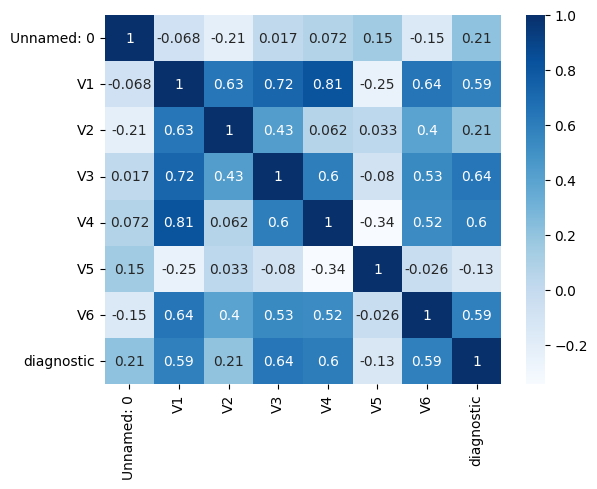

In [7]:
plt = sns.heatmap(dataset.corr(), annot=True, cmap='Blues')
plt

Analisando o gráfico acima, podemos verificar que as colunas que mais tem correlação com a nossa coluna alvo, que nesse caso seria a "diagnostic" são as colunas:
- v1
- v3
- v4
- v6

Essas colunas tem uma correlação positiva muito forte com a nossa coluna alvo, ou seja, quando uma variável aumenta, a outra também tende a aumentar.


## Separando os dados para treinamento

Depois de ter verificado as principais colunas, vamos separar os dados para iniciar o treinamento do nosso modelo

In [8]:
# Primeiro vamos separar o dataset para pegar as colunas que realmente importa
dataset_treino = dataset.drop(['Unnamed: 0','V2','V5'], axis=1)

# Depois vamos separar as colunas entre X e y
X = dataset_treino.drop('diagnostic', axis=1)
y = dataset_treino['diagnostic']

### Verificando nossa variável X

A nossa variável X vai conter os dados que iremos usar para treinar nosso modelo

In [9]:
X.sample(10)

,V1,V3,V4,V6
158,57.035097,49.198003,56.689369,52.165145
152,63.404481,48.136806,49.289153,31.784495
163,115.923261,76.800000,78.407825,81.198927
244,63.026300,51.605017,35.690060,7.439870
300,50.676677,35.000000,44.215175,-0.214711
84,76.326002,57.200000,33.929797,50.127457
204,56.535051,44.991547,42.157862,25.773174
42,53.854798,32.779060,34.624155,5.329843
17,31.276012,32.562996,28.131342,3.623020
286,61.734875,46.900000,44.620563,3.087726


### Verificando nossa variável y

Nossa variável y será o "alvo" ou seja, o que o nosso modelo irá tentar predizer

In [10]:
y.sample(10)

,diagnostic
271,1
179,2
266,1
241,1
308,1
301,1
123,2
175,2
304,1
252,1


### Uso do train_test_split

Usando a função train_test_split, separamos os dados para treinamento e teste do nosso modelo sendo que a porcentagem de teste ficou em 20% de todo o dataset

In [11]:
# Separando os dados para treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Treinamento

Para treinar o nosso modelo, vamos utilizar três métodos: os algoritmos RandomForestClassifier, DecisionTreeClassifier e uma rede neural. Ao final, iremos comparar a acurácia de cada um deles

### Treinamento usando o RandomForestClassifier

O RandomForestClassifier é um algoritmo de treinamento de máquinas usando o conceito de florestas aleatórias

In [12]:
# Usando o RandomForestClassifier para treinar o modelo
model = RandomForestClassifier(random_state=42)

In [13]:
# treinando o modelo
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [14]:
# calculando a acuracia
acuracia = accuracy_score(y_test, y_pred)
print(f'A porcentagem de acurácia é de {(acuracia * 100):.2f}%')

A porcentagem de acurácia é de 77.42%


### Treinamento com o DecisionTreeClassifier

O DecisionTreeClassifier é um algoritmo de aprendizado supervisionado que resolve problemas de classificação

In [15]:
# usando a Árvore de Decisão (Decision Tree)
from sklearn import tree
modelo2 = tree.DecisionTreeClassifier(random_state=42)

In [16]:
# Treinando o modelo
modelo2.fit(X_train, y_train)
y2_pred = modelo2.predict(X_test)

In [17]:
# Verificando a acuracia
acuracia2 = accuracy_score(y_test, y2_pred)
print(f'A porcentagem de acurácia é de {(acuracia2 * 100):.2f}%')

A porcentagem de acurácia é de 74.19%


### Treinamento com uma rede neural

Uma rede neural é um algoritmo de aprendizado de máquina inspirado no funcionamento do cérebro humano. Ela é composta por várias camadas de neurônios artificiais, que são nós interconectados

In [25]:
# intânciando o modelo da rede neural
modeloRN = Sequential()

In [26]:
# Verificando a quantidade de input de entrada

# A quantidade de colunas no X (os dados de entrada) é extremamente importante ao treinar uma rede neural,
# pois define o número de features (características) que o modelo vai processar
X_train.shape

(248, 4)

In [27]:
# hidden layer 1 ----> 128 neurônios (escolhido arbitrariamente) como é a primeira camada precisa passar o input_dim
# input_dim define a quantidade de input de entrada que terá nossa rede neural
modeloRN.add(Dense(units=128, activation='relu', input_dim=4))

# hidden layer 2 ----> 32 neurônios (escolhido arbitrariamente)
modeloRN.add(Dense(units=32, activation='relu'))

# OutPut Layer -----> 3 neurônios pois são 3 classes a prever
# softmax utilizada em problemas de classificação multiclasses (A, B, C...)
# sigmoid é usada em problemas de classificação binária 0 ou 1
modeloRN.add(Dense(units=3, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
#relatório da arquitetura
modeloRN.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,867 (19.01 KB)

 Trainable params: 4,867 (19.01 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Usamos o loss=sparse_categorical_crossentropy pois ele serve para problemas multiclasses
modeloRN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
# Treinamento do modelo
historico = modeloRN.fit(X_train, y_train, epochs=300)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4777 - loss: 2.7720
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6886 - loss: 0.8218 
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7757 - loss: 0.5021 
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7753 - loss: 0.6306 
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7935 - loss: 0.4178 
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8079 - loss: 0.4596 
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8217 - loss: 0.4110 
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8311 - loss: 0.4329 
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8304 - loss: 0.4164 
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8007 - loss: 0.4055 
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8061 - loss: 0.4506 
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8192 - loss

#### Acurácia aumentando e loss diminuindo

Com o tempo o nosso modelo vai ficando mais "inteligente" e aprendendo com os seus erros e por isso conseguimos ver que a nossa acurácia vai aumentando e o loss diminuindo conforme as epoch do nosso modelo passa

In [31]:
# Aqui vamos ver o histórico da acurácia do nosso modelo
historico.history

{'accuracy': [0.4838709533214569,
  0.6975806355476379,
  0.774193525314331,
  0.774193525314331,
  0.7903226017951965,
  0.8225806355476379,
  0.8266128897666931,
  0.8185483813285828,
  0.8306451439857483,
  0.7983871102333069,
  0.8064516186714172,
  0.7983871102333069,
  0.8064516186714172,
  0.7943548560142517,
  0.8225806355476379,
  0.8185483813285828,
  0.8225806355476379,
  0.7862903475761414,
  0.8225806355476379,
  0.8185483813285828,
  0.8306451439857483,
  0.8225806355476379,
  0.8387096524238586,
  0.8104838728904724,
  0.7983871102333069,
  0.8225806355476379,
  0.8387096524238586,
  0.8145161271095276,
  0.8145161271095276,
  0.8145161271095276,
  0.8064516186714172,
  0.8185483813285828,
  0.8266128897666931,
  0.7943548560142517,
  0.850806474685669,
  0.8104838728904724,
  0.8306451439857483,
  0.8266128897666931,
  0.8225806355476379,
  0.8185483813285828,
  0.8185483813285828,
  0.8185483813285828,
  0.8225806355476379,
  0.8064516186714172,
  0.8185483813285828,
 

## Conclusão

Podemos Concluir que a rede neural teve uma quantidade significamente maior de acurácia comparada com os dois outros métodos de treinamento, ficando o seguinte ranking

1. Rede Neural com acurácia de 85%
2. RandomForestClassifier com acurácia de 77%
3. DecisionTreeClassifier com aucária de 74%